In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from APT_coherence_T_utils import *

In [3]:
import os
import sys
import importlib
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Prefer the installed rqc package, not the local repo copy in control_transition
SITE_PACKAGES = '/p/home/hpan/.pyenv/versions/miniforge3-25.1.1-2/lib/python3.12/site-packages'
PROJECT_ROOT = os.path.expandvars('$WORKDIR/control_transition')
LOCAL_RQC = str(Path(PROJECT_ROOT) / 'rqc')

clean_sys_path = []
for p in sys.path:
    if p in ('', os.getcwd(), PROJECT_ROOT, LOCAL_RQC):
        continue
    if 'control_transition' in p and 'site-packages' not in p:
        continue
    clean_sys_path.append(p)
if SITE_PACKAGES not in clean_sys_path:
    clean_sys_path.insert(0, SITE_PACKAGES)
sys.path = clean_sys_path

if 'rqc' in sys.modules:
    del sys.modules['rqc']
importlib.invalidate_caches()
import rqc




In [ ]:
# os.environ['WORKDIR']="/scratch/hp636/"

In [8]:
data_dict_pf1 = load_apt_coherence(p_f=1, p_f_int=1, zipfilename='APT_coherence_T_pf1_6L.zip',
BATCH_CONFIG = {
    12: {'es_C_batch': 2000, 'num_batches': 4},
    14: {'es_C_batch': 2000, 'num_batches': 4},
    16: {'es_C_batch': 2000, 'num_batches': 4},
    18: {'es_C_batch': 2000, 'num_batches': 4},
    20: {'es_C_batch': 1000, 'num_batches': 4},
    22: {'es_C_batch': 24*10, 'num_batches': 8000//(24*10)+1},
    24: {'es_C_batch': 24*2, 'num_batches': 8000//(24*2)+1}
},
p_m_list = np.unique(np.hstack([np.arange(0, 0.06, 0.02), np.arange(0.06, 0.08, 0.01), np.arange(0.085, 0.101, 0.005),np.arange(0.11, 0.13, 0.01), [0.0, 0.05, 0.14, 0.15, 0.16,0.17,0.18,0.19, 0.2]])))
# p_m_list = [0.0, 0.05, 0.15, 0.2, 0.4,0.6, ])

generate_params:   0%|          | 0/84 [00:00<?, ?it/s]

generate_params: 100%|██████████| 3507/3507 [00:01<00:00, 2958.87it/s]


In [9]:
data_pf1_df = apt_coherence_to_df(data_dict_pf1)

In [10]:
data_pf1_df

observations
Metrics   L  p_m p_f es_m es_C                                                   
coherence 12 0.0 1.0 1    1     [906.8074456317973, 2157.45638227963, 2711.435...
                          2     [825.004505791548, 2289.8086414157174, 2909.32...
                          3     [916.1432764541147, 2398.8460723393423, 2780.8...
                          4     [1126.0416346148793, 2177.636681437101, 2793.8...
                          5     [1392.2096317665423, 2376.3273486885937, 3000....
...                                                                           ...
          24 0.2 1.0 1    4028  [53393.33, 5715.2236, 10251.67, 44986.137, 136...
                          4029  [5772.603, 45440.258, 5231.2275, 12538.399, 17...
                          4030  [115416.016, 29672.816, 4381.1323, 60618.734, ...
                          4031  [52156.797, 5622.8623, 18127.105, 102449.26, 2...
                          4032  [2585.3467, 2499.7188, 17413.566, 5037.1704, 2...

[827984 rows x 1 columns]

In [11]:
data_pf1_df_mean=aggregate_over_samples(data_pf1_df)
# data_pf1_df_mean=aggregate_over_samples(data_pf1_df.query('es_m <= 2000'))

In [12]:
data_pf1_df_mean.to_pickle('APT_coherence_T_pf1_6L_df.pickle')

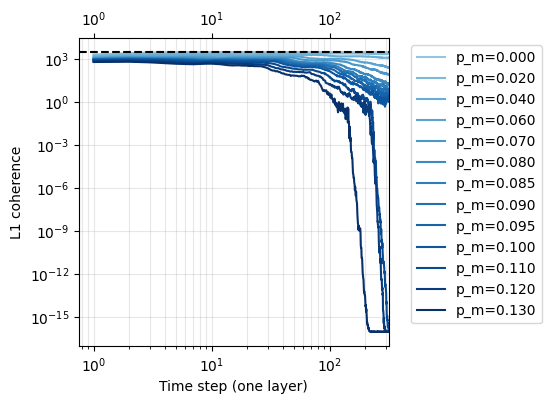

In [12]:
plot_apt_coherence_T_vs_steps_fixedL(data_pf1_df, L=12)


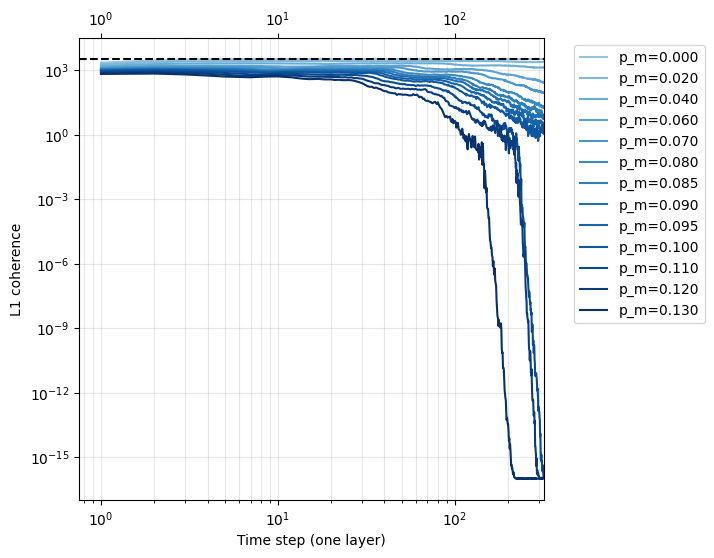

In [35]:
plot_apt_coherence_T_vs_steps_fixedL(data_pf1_df, L=12)


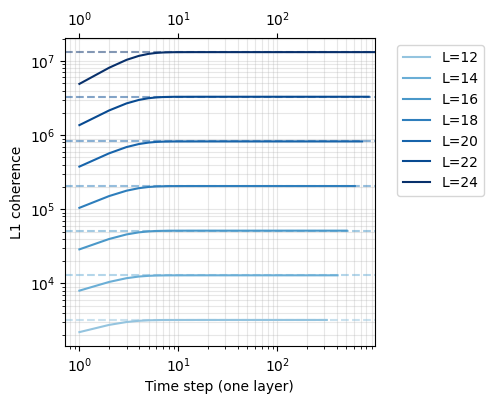

In [39]:
plot_apt_coherence_T_vs_steps_fixedp_m(data_pf1_df, p_m=0.00)

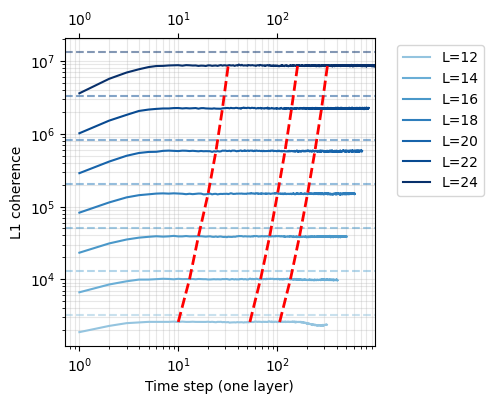

In [43]:
plot_apt_coherence_T_vs_steps_fixedp_m(data_pf1_df, p_m=0.02, prefactor=[.2,1,2])

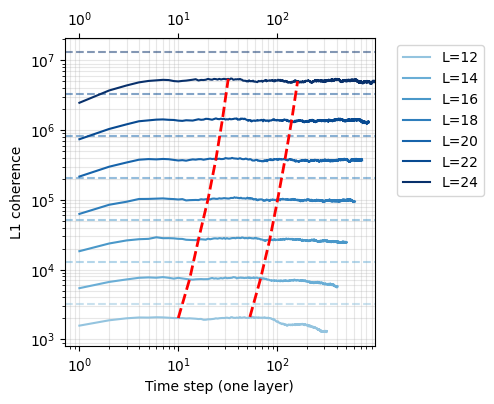

In [44]:
plot_apt_coherence_T_vs_steps_fixedp_m(data_pf1_df, p_m=0.04, prefactor=[.2,1])

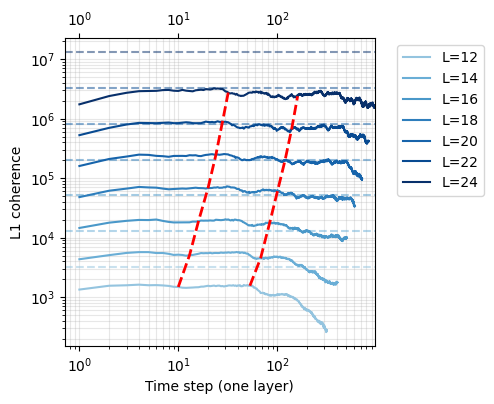

In [45]:
plot_apt_coherence_T_vs_steps_fixedp_m(data_pf1_df, p_m=0.06, prefactor=[.2,1])

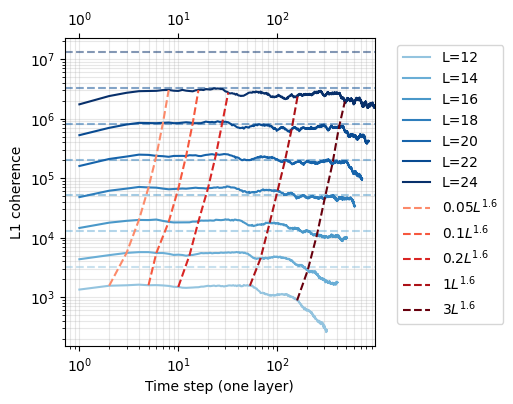

In [59]:
plot_apt_coherence_T_vs_steps_fixedp_m(data_pf1_df, p_m=0.06, prefactor=[.05,.1,.2,1,3])

4000
4000
4000
4000
4000
4080
384


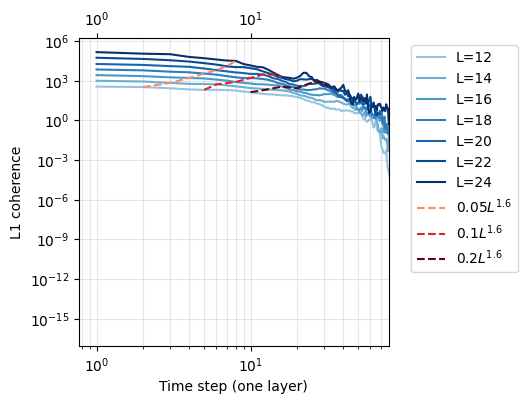

In [186]:
plot_apt_coherence_T_vs_steps_fixedp_m(data_pf1_df, p_m=0.18, prefactor=[.05,.1,.2], theory_line=False)


4000
4000
4000
4000
4000
4080
3744


(1.0, 1000000.0)

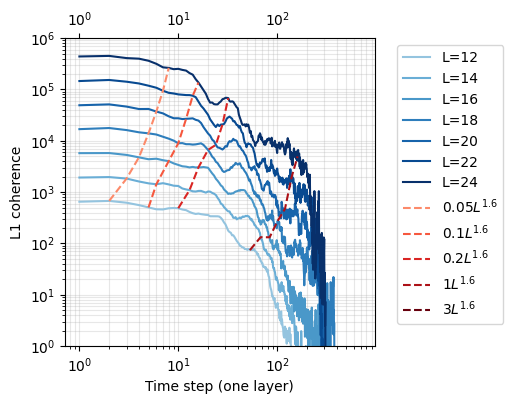

In [62]:
plot_apt_coherence_T_vs_steps_fixedp_m(data_pf1_df, p_m=0.13, prefactor=[.05,.1,.2,1,3], theory_line=False)
plt.ylim(1e0,1e6)

4000
4000
4000
4000
4000
4080
3744


(1.0, 1000000.0)

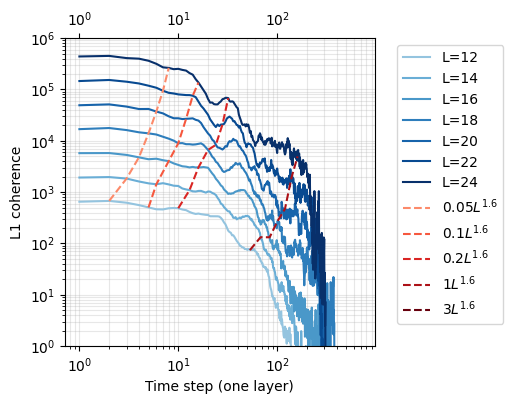

In [38]:
plot_apt_coherence_T_vs_steps_fixedp_m(data_pf1_df, p_m=0.13, prefactor=[.05,.1,.2,1,3], theory_line=False)
plt.ylim(1e0,1e6)

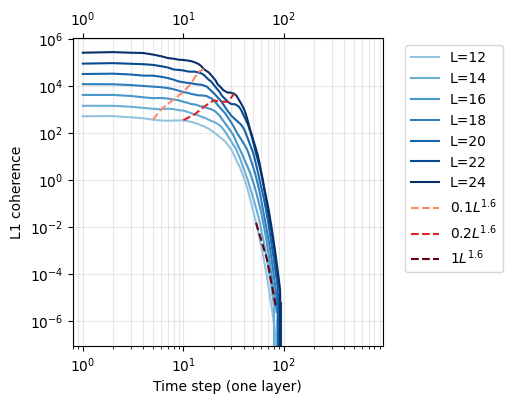

In [82]:
plot_apt_coherence_T_vs_steps_fixedp_m(data_pf1_df, p_m=0.12, prefactor=[.1,.2,1,], average_log=True)

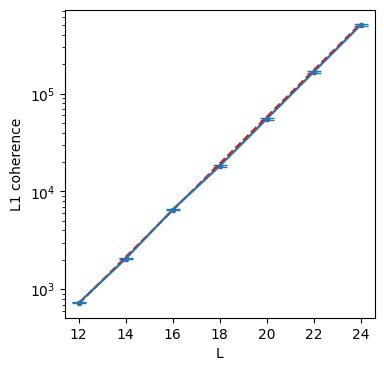

In [78]:
plot_apt_coherence_T_vs_L(data_pf1_df, p_m=0.11, min_func=lambda L: int(0.1*L**1.6), max_func=lambda L: int(0.1*L**1.6)+1, idx_max=3)

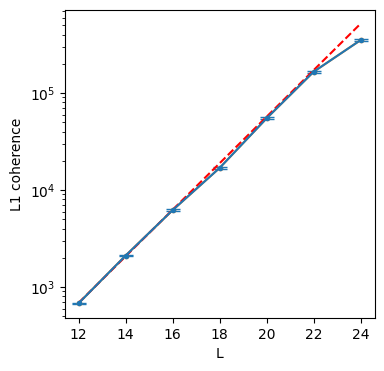

In [77]:
plot_apt_coherence_T_vs_L(data_pf1_df, p_m=0.11, min_func=lambda L: int(0.12*L**1.6), max_func=lambda L: int(0.12*L**1.6)+1, idx_max=3)

Text(0.5, 1.0, '$p_{m}=0.0$')

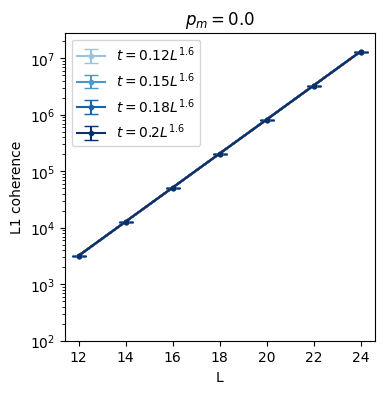

In [118]:
fig, ax =plt.subplots(figsize=(4, 4))
t_list = [0.12,0.15, 0.18, 0.2,]
color_list = plt.cm.Blues(np.linspace(0.4, 1, len(t_list)))
p_m  = 0.0
for idx,t in enumerate(t_list):
    plot_apt_coherence_T_vs_L(data_pf1_df, p_m=p_m, min_func=lambda L: int(t*L**1.6), max_func=lambda L: int(t*L**1.6)+1, idx_max=3, ax=ax, color = color_list[idx], label=f'$t={t}L^{{1.6}}$')
ax.legend()
ax.set_ylim(1e2,None)
ax.set_title(f'$p_{{m}}={p_m}$')    

Text(0.5, 1.0, '$t=0.2L^{1.6}$')

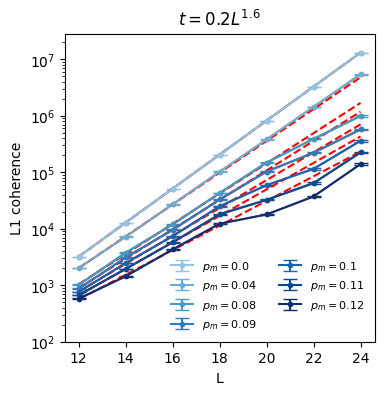

In [137]:
fig, ax =plt.subplots(figsize=(4, 4))
t=0.2
p_m_list  = [0.0, 0.04, 0.08, 0.09, 0.10,0.11,0.12]
color_list = plt.cm.Blues(np.linspace(0.4, 1, len(p_m_list)))
for idx,p_m in enumerate(p_m_list):
    plot_apt_coherence_T_vs_L(data_pf1_df, p_m=p_m, min_func=lambda L: int(t*L**1.6), max_func=lambda L: int(t*L**1.6)+1, idx_max=3, ax=ax, color = color_list[idx], label=f'$p_{{m}}={p_m}$')
ax.legend(ncols=2, fontsize=8,frameon=False)
ax.set_ylim(1e2,None)
ax.set_title(f'$t={t}L^{{1.6}}$')    

<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_12483/2074251437.py:9: SyntaxWarning: invalid escape sequence '\i'
  ax.set_title(f'$t\in{t}L^{{1.6}}$')


Text(0.5, 1.0, '$t\\in[0.12, 0.2]L^{1.6}$')

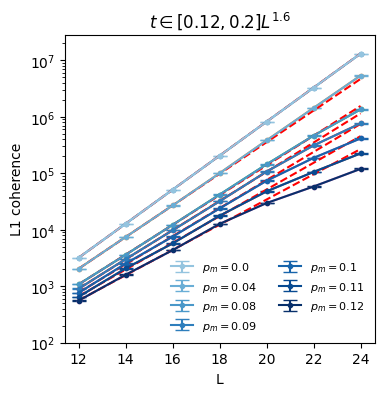

In [136]:
fig, ax =plt.subplots(figsize=(4, 4))
t=[0.12, 0.2]
p_m_list  = [0.0, 0.04, 0.08, 0.09, 0.10,0.11,0.12]
color_list = plt.cm.Blues(np.linspace(0.4, 1, len(p_m_list)))
for idx,p_m in enumerate(p_m_list):
    plot_apt_coherence_T_vs_L(data_pf1_df, p_m=p_m, min_func=lambda L: int(t[0]*L**1.6), max_func=lambda L: int(t[1]*L**1.6)+1, idx_max=3, ax=ax, color = color_list[idx], label=f'$p_{{m}}={p_m}$')
ax.legend(ncols=2, fontsize=8,frameon=False)
ax.set_ylim(1e2,None)
ax.set_title(f'$t\in{t}L^{{1.6}}$')    

<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_12483/3299609506.py:9: SyntaxWarning: invalid escape sequence '\i'
  ax.set_title(f'$t\in{t}L^{{1.6}}$')


Text(0.5, 1.0, '$t\\in[0.12, 0.18]L^{1.6}$')

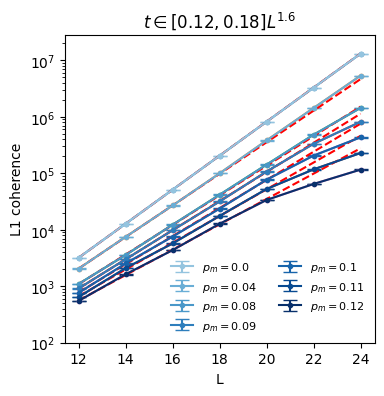

In [138]:
fig, ax =plt.subplots(figsize=(4, 4))
t=[0.12, 0.18]
p_m_list  = [0.0, 0.04, 0.08, 0.09, 0.10,0.11,0.12]
color_list = plt.cm.Blues(np.linspace(0.4, 1, len(p_m_list)))
for idx,p_m in enumerate(p_m_list):
    plot_apt_coherence_T_vs_L(data_pf1_df, p_m=p_m, min_func=lambda L: int(t[0]*L**1.6), max_func=lambda L: int(t[1]*L**1.6)+1, idx_max=3, ax=ax, color = color_list[idx], label=f'$p_{{m}}={p_m}$')
ax.legend(ncols=2, fontsize=8,frameon=False)
ax.set_ylim(1e2,None)
ax.set_title(f'$t\in{t}L^{{1.6}}$')    

In [ ]:
in slurm_out, i wnat to find a file which both contain `L 22` and `DUE TO TIME LIMIT`

In [1]:
384/24

16.0

In [2]:
10*60/16

37.5

In [ ]:
L=22

In [16]:
24*10, 2000//(24*10)+1

(240, 9)

In [ ]:
L=24

In [20]:
24*2, 2000//(24*2)+1

(48, 42)

In [ ]:
L=22 : 9:46:51/(384/24) = 

In [ ]:
L = 24 : 9:52:55/3 = 3h20

In [21]:
import numpy as np

In [23]:
len(np.hstack([np.arange(0, 0.06, 0.02), np.arange(0.06, 0.08, 0.01), np.arange(0.085, 0.101, 0.005),np.arange(0.11, 0.13, 0.01), ]))

13

In [4]:
from post_analysis_APT_fluct_T_all import run

In [5]:
run(12, 0.085, "OP")

  0%|          | 0/1 [00:00<?, ?it/s]

0.085 12


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


In [209]:
string ="""--L 24 --p_m 0.140 0.140 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1249 1297
--L 24 --p_m 0.160 0.160 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1249 1297
--L 24 --p_m 0.170 0.170 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1249 1297
--L 24 --p_m 0.180 0.180 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1249 1297
--L 24 --p_m 0.190 0.190 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1249 1297
--L 24 --p_m 0.140 0.140 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1297 1345
--L 24 --p_m 0.160 0.160 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1297 1345
--L 24 --p_m 0.170 0.170 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1297 1345
--L 24 --p_m 0.180 0.180 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1297 1345
--L 24 --p_m 0.190 0.190 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1297 1345
--L 24 --p_m 0.140 0.140 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1345 1393
--L 24 --p_m 0.160 0.160 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1345 1393
--L 24 --p_m 0.170 0.170 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1345 1393
--L 24 --p_m 0.180 0.180 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1345 1393
--L 24 --p_m 0.190 0.190 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1345 1393
--L 24 --p_m 0.140 0.140 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1393 1441
--L 24 --p_m 0.160 0.160 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1393 1441
--L 24 --p_m 0.170 0.170 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1393 1441
--L 24 --p_m 0.180 0.180 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1393 1441
--L 24 --p_m 0.190 0.190 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1393 1441
--L 24 --p_m 0.140 0.140 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1441 1489
--L 24 --p_m 0.160 0.160 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1441 1489
--L 24 --p_m 0.170 0.170 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1441 1489
--L 24 --p_m 0.180 0.180 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1441 1489
--L 24 --p_m 0.190 0.190 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1441 1489
--L 24 --p_m 0.140 0.140 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1489 1537
--L 24 --p_m 0.160 0.160 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1489 1537
--L 24 --p_m 0.170 0.170 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1489 1537
--L 24 --p_m 0.180 0.180 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1489 1537"""


In [210]:
print(' && '.join([f'python run_APT_coherence_T.py {s} --n_jobs 48' for s in string.split('\n')]))

python run_APT_coherence_T.py --L 24 --p_m 0.140 0.140 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1249 1297 --n_jobs 48 && python run_APT_coherence_T.py --L 24 --p_m 0.160 0.160 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1249 1297 --n_jobs 48 && python run_APT_coherence_T.py --L 24 --p_m 0.170 0.170 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1249 1297 --n_jobs 48 && python run_APT_coherence_T.py --L 24 --p_m 0.180 0.180 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1249 1297 --n_jobs 48 && python run_APT_coherence_T.py --L 24 --p_m 0.190 0.190 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1249 1297 --n_jobs 48 && python run_APT_coherence_T.py --L 24 --p_m 0.140 0.140 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1297 1345 --n_jobs 48 && python run_APT_coherence_T.py --L 24 --p_m 0.160 0.160 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1297 1345 --n_jobs 48 && python run_APT_coherence_T.py --L 24 --p_m 0.170 0.170 1 --p_f 1.000 1.000 1 --es 1 2 --es_C 1297 1345 --n_jobs 48 && python run_APT_coherence_T.py --L 24 --p_m 0.180 0.180 1

In [ ]:
APT_En(1,501)_EnC(369,371)_pm(0.130,0.130,1)_pf(1.000,1.000,1)_L20_OP_T.pickle
'APT_En(1,501)_EnC(1,51)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L12_OP_T.pickle'

In [55]:
with open("/p/work/hpan/control_transition/APT_OP_T/APT_En(1,501)_EnC(101,151)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L12_OP_T.pickle", "rb") as f:
    data = pickle.load(f)

In [60]:
data['OP'][0,0,:,0,:]**2

array([[2.40765343e-01, 1.84856269e-01, 1.95168181e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.36003479e-01, 1.74934479e-01, 1.90951711e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.36003479e-01, 1.56195128e-01, 1.65601666e-01, ...,
        2.53950188e-76, 1.28423480e-77, 2.49768877e-77],
       ...,
       [2.48443894e-01, 1.89252544e-01, 2.28530407e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.48443894e-01, 1.80524204e-01, 1.85640631e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.88146514e-01, 1.49693511e-01, 1.75146490e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], shape=(500, 319))

In [58]:
data['OP'][0,0,:,0,:]

array([[4.90678452e-01, 4.29949147e-01, 4.41778430e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.85801893e-01, 4.18251693e-01, 4.36980218e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.85801893e-01, 3.95215293e-01, 4.06941846e-01, ...,
        1.59358146e-38, 3.58362219e-39, 4.99768823e-39],
       ...,
       [4.98441465e-01, 4.35031659e-01, 4.78048541e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.98441465e-01, 4.24881400e-01, 4.30860338e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.33758589e-01, 3.86902457e-01, 4.18505065e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], shape=(500, 319))

In [59]:
data['OP2'][0,0,:,0,:]

array([[2.40765343e-01, 1.84856269e-01, 1.95168181e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.36003479e-01, 1.74934479e-01, 1.90951711e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.36003479e-01, 1.56195128e-01, 1.65601666e-01, ...,
        2.53950188e-76, 1.28423480e-77, 2.49768877e-77],
       ...,
       [2.48443894e-01, 1.89252544e-01, 2.28530407e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.48443894e-01, 1.80524204e-01, 1.85640631e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.88146514e-01, 1.49693511e-01, 1.75146490e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], shape=(500, 319))

# load raw

In [23]:
int(12* 14**1.6)

818

In [1]:
import glob, os, pickle, numpy as np
from tqdm import tqdm
L=16
# paths = sorted(glob.glob(f"/p/work/hpan/control_transition/APT_OP_T/*L{L}*"))
paths = sorted(glob.glob(f"/scratch/hp636/control_transition/APT_OP_T/*L{L}*"))
# print(f"Found {len(paths)} files:")
# for p in paths:
#     print(" -", p)
files_missing = []
print("\nLoading and checking OP shape...")
for p in tqdm(paths):
    try:
        with open(p, "rb") as f:
            zz = pickle.load(f)
        if not isinstance(zz, dict) or "OP" not in zz:
            print(f"{p}: missing 'OP' key")
            continue
        op = zz["OP"]
        shape = getattr(op, "shape", None)
        if shape is None:
            print(f"{p}: OP has no shape attribute")
            continue
        if shape[-1] != int(12* L**1.6):
            print(f"{p}: OP shape {shape}, expected last dim 1013")
            files_missing.append(p)
    except Exception as exc:
        print(f"{p}: failed to load ({exc})")



Loading and checking OP shape...


  0%|          | 1/350 [00:00<01:01,  5.71it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(1,11)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


  3%|▎         | 9/350 [00:01<00:54,  6.23it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(101,111)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


  4%|▍         | 15/350 [00:02<00:58,  5.72it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(11,21)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


  7%|▋         | 23/350 [00:03<00:55,  5.90it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(111,121)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


  9%|▊         | 30/350 [00:05<00:52,  6.11it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(121,131)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 13%|█▎        | 44/350 [00:07<00:48,  6.25it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(141,151)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 15%|█▍        | 51/350 [00:08<00:46,  6.39it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(151,161)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 17%|█▋        | 58/350 [00:09<00:50,  5.83it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(161,171)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 19%|█▊        | 65/350 [00:10<00:43,  6.49it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(171,181)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(171,181)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 21%|██        | 72/350 [00:12<00:44,  6.20it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(181,191)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(181,191)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 23%|██▎       | 79/350 [00:13<00:44,  6.10it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(191,201)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(191,201)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 25%|██▍       | 87/350 [00:14<00:44,  5.94it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(201,211)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 26%|██▋       | 92/350 [00:15<00:46,  5.55it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(21,31)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 29%|██▉       | 101/350 [00:17<00:41,  5.95it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(211,221)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 31%|███       | 108/350 [00:18<00:38,  6.22it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(221,231)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 33%|███▎      | 114/350 [00:19<00:38,  6.17it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(231,241)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(231,241)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 35%|███▍      | 121/350 [00:20<00:38,  5.89it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(241,251)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(241,251)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 37%|███▋      | 128/350 [00:21<00:36,  6.11it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(251,261)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(251,261)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 39%|███▊      | 135/350 [00:23<00:51,  4.15it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(261,271)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(261,271)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 41%|████      | 142/350 [00:24<00:37,  5.58it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(271,281)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(271,281)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 43%|████▎     | 149/350 [00:25<00:32,  6.19it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(281,291)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(281,291)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 45%|████▍     | 156/350 [00:26<00:31,  6.12it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(291,301)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(291,301)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 47%|████▋     | 163/350 [00:28<00:29,  6.38it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(301,311)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(301,311)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 49%|████▊     | 170/350 [00:29<00:30,  5.93it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(31,41)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 51%|█████     | 177/350 [00:30<00:30,  5.60it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(311,321)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(311,321)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 53%|█████▎    | 185/350 [00:31<00:27,  6.01it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(321,331)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 55%|█████▍    | 191/350 [00:32<00:26,  5.97it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(331,341)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(331,341)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 57%|█████▋    | 198/350 [00:33<00:23,  6.49it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(341,351)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(341,351)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 59%|█████▊    | 205/350 [00:35<00:23,  6.19it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(351,361)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(351,361)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 61%|██████    | 212/350 [00:36<00:26,  5.13it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(361,371)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(361,371)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 63%|██████▎   | 219/350 [00:38<00:23,  5.55it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(371,381)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(371,381)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 65%|██████▍   | 226/350 [00:39<00:19,  6.39it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(381,391)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(381,391)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 67%|██████▋   | 233/350 [00:40<00:19,  6.13it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(391,401)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(391,401)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 69%|██████▊   | 240/350 [00:41<00:20,  5.49it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(401,411)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(401,411)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 71%|███████   | 247/350 [00:42<00:17,  5.98it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(41,51)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 73%|███████▎  | 254/350 [00:43<00:14,  6.45it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(411,421)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(411,421)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 75%|███████▍  | 261/350 [00:45<00:15,  5.81it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(421,431)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(421,431)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 77%|███████▋  | 268/350 [00:46<00:12,  6.55it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(431,441)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013
/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(431,441)_pm(0.087,0.087,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 79%|███████▊  | 275/350 [00:47<00:12,  6.03it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(441,451)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 81%|████████  | 282/350 [00:48<00:11,  6.05it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(451,461)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 83%|████████▎ | 289/350 [00:49<00:10,  5.69it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(461,471)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 85%|████████▍ | 296/350 [00:51<00:08,  6.34it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(471,481)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 91%|█████████ | 317/350 [00:54<00:05,  5.74it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(51,61)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 93%|█████████▎| 324/350 [00:55<00:04,  5.94it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(61,71)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 95%|█████████▍| 331/350 [00:57<00:03,  6.14it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(71,81)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 97%|█████████▋| 338/350 [00:58<00:01,  6.30it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(81,91)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


 99%|█████████▊| 345/350 [00:59<00:00,  6.38it/s]

/scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(91,101)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle: OP shape (1, 1, 500, 10, 844), expected last dim 1013


100%|██████████| 350/350 [01:00<00:00,  5.80it/s]


In [2]:
len(files_missing)

70

In [3]:
from pathlib import Path
import shutil

# src_root = Path("/p/work/hpan/control_transition/APT_OP_T")
# dst_root = Path("/p/work/hpan/control_transition/APT_OP_T_bak")
src_root = Path("/scratch/hp636/control_transition/APT_OP_T")
dst_root = Path("/scratch/hp636/control_transition/APT_OP_T_bak")
# dst_root.mkdir(exist_ok=True)

moved, missing = 0, 0
for item in files_missing:
    p = Path(item)
    src = p if p.is_absolute() else src_root / p.name  # handle full paths or basenames
    if not src.exists():
        print(f"missing: {src}")
        missing += 1
        continue
    dst = dst_root / src.name
    shutil.move(str(src), str(dst))
    print(f"moved: {src} -> {dst}")
    moved += 1

print(f"done: moved {moved}, missing {missing}")


moved: /scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(1,11)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle -> /scratch/hp636/control_transition/APT_OP_T_bak/APT_En(1,501)_EnC(1,11)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle
moved: /scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(101,111)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle -> /scratch/hp636/control_transition/APT_OP_T_bak/APT_En(1,501)_EnC(101,111)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle
moved: /scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(11,21)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle -> /scratch/hp636/control_transition/APT_OP_T_bak/APT_En(1,501)_EnC(11,21)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle
moved: /scratch/hp636/control_transition/APT_OP_T/APT_En(1,501)_EnC(111,121)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L16_OP_T.pickle -> /scratch/hp636/control_transition/APT_OP_T_bak/APT_En(1,501)_EnC(111,121)_pm(0.085,0.085,1)_pf(1.000,1.0

In [21]:
with open("/p/work/hpan/control_transition/APT_OP_T/APT_En(1,501)_EnC(101,126)_pm(0.085,0.085,1)_pf(1.000,1.000,1)_L14_OP_T.pickle", "rb") as f:
    zz = pickle.load(f)

In [22]:
zz['OP'].shape

(1, 1, 500, 25, 818)

# Load 

In [1]:
%load_ext autoreload
%autoreload 2
import clifford_utils
import pickle
import numpy as np
import os
import rqc
import matplotlib.pyplot as plt
import fss

In [3]:
p_m_list = np.array([0.085,0.087,0.089,0.09,0.091,0.093,0.095, ])
L_list = [12,14]


In [4]:
data_dict = {}
for p_m in p_m_list:
    for L in L_list:
        fn =  f'traj_state_var_{p_m:.3f}_OP_L{L}_APT.pickle'
        if os.path.exists(fn):
            with open(fn,'rb') as f:
                data_ = pickle.load(f)
                for key in data_:
                    data_dict[key, p_m, L] = data_[key][p_m, L]
                    if key == 'ob1_mean':
                        data_dict['n_def', p_m, L] = data_[key][p_m, L]

        else:
            print(f'File {fn} not found.')



In [5]:
data_df = rqc.convert_pd(data_dict, names=['Metrics', 'p_m', 'L'])

In [6]:
data_df.iloc[0]['observations'].shape

(639,)

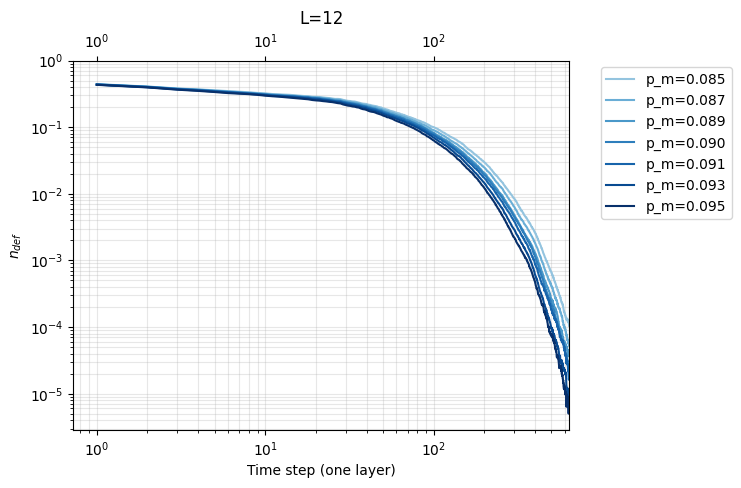

In [7]:
fig, ax = plt.subplots()
# y = data_df.xs(('n_def', 0.09, 12))['observations']
# x = np.arange(len(y))
# clifford_utils.simple_linearfit(x,y, xfunc=np.log, yfunc=np.log, ax=ax)

clifford_utils.plot_metric_T_vs_steps_fixedL( data_df, L=12, metric='n_def' ,ylabel='$n_{def}$', ylim=(None, 1), ax=ax)

# p_m_list=[0.66,.67,.69]
# clifford_utils.plot_metric_T_vs_steps_fixedL( data_df, L=64, metric='n_def' ,ylabel='$n_{def}$', ylim=(1e-1, .5), ax=ax, cmap=plt.cm.Reds)


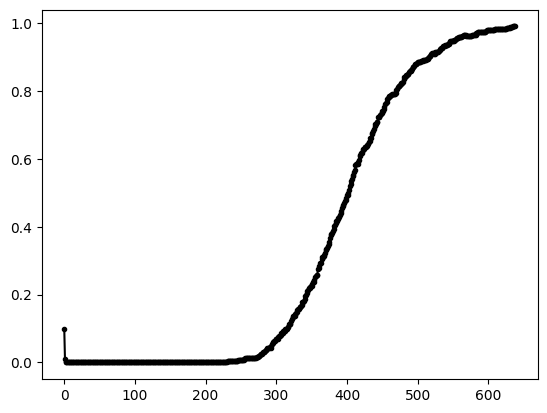

In [8]:
fig, ax=plt.subplots()
metric = 'traj_weight'
p_m = 0.095
L = 12
y = data_df.xs((metric, p_m, L), level = ('Metrics','p_m','L'))['observations'].iloc[0]
ax.plot( y, '.-', label=f'p={p_m}', color='k')

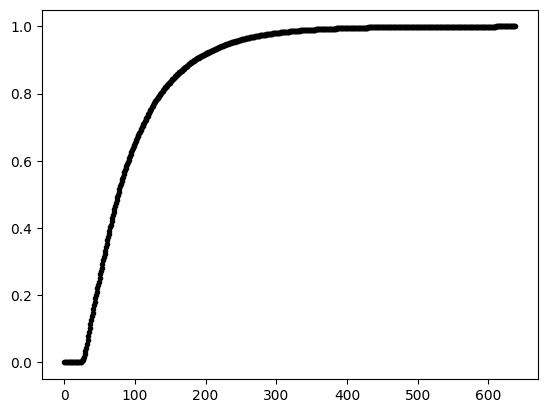

In [10]:
fig, ax=plt.subplots()
metric = 'state_weight'
p_m = 0.09
L = 12
y = data_df.xs((metric, p_m, L), level = ('Metrics','p_m','L'))['observations'].iloc[0]
ax.plot( y, '.-', label=f'p={p_m}', color='k')

In [11]:
6*12**1.62

336.0662260513586

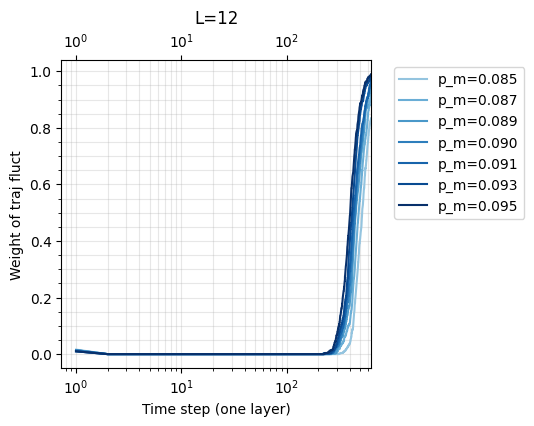

In [9]:
clifford_utils.plot_metric_T_vs_steps_fixedL( data_df, L=12, metric='traj_weight' ,ylabel='Weight of traj fluct',  ax=None, yscale='linear', p_m_list =None )


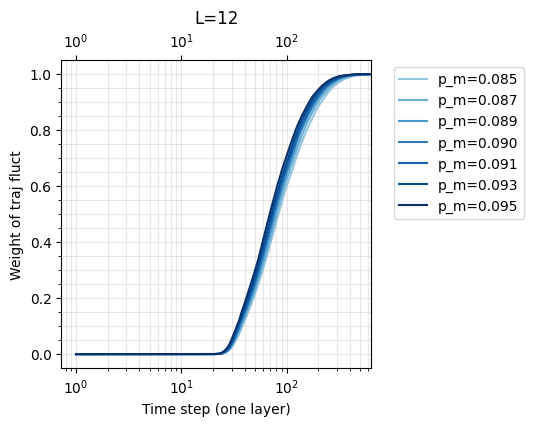

In [10]:
clifford_utils.plot_metric_T_vs_steps_fixedL( data_df, L=12, metric='state_weight' ,ylabel='Weight of traj fluct',  ax=None, yscale='linear', p_m_list =None )


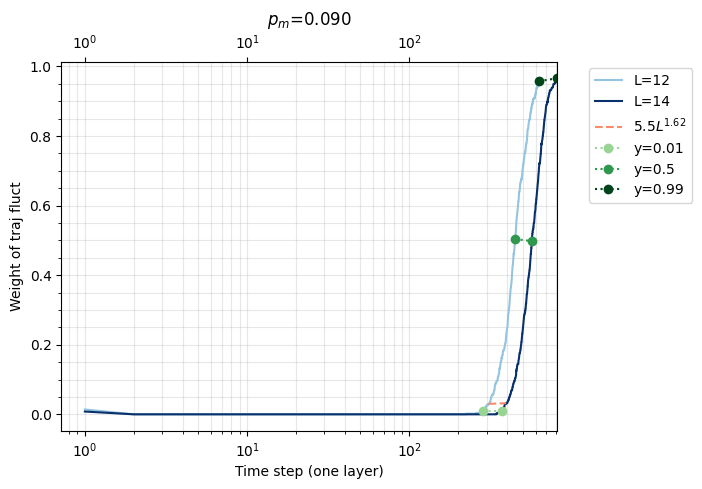

In [15]:
fig, ax=plt.subplots()

quantile_pts = clifford_utils.plot_metric_T_vs_steps_fixedp_m( data_df, p_m=0.09, metric='traj_weight' ,ylabel='Weight of traj fluct',  ax=ax, yscale='linear', prefactor=5.5 , quantile = [.01,0.50,0.99], L_list=L_list)

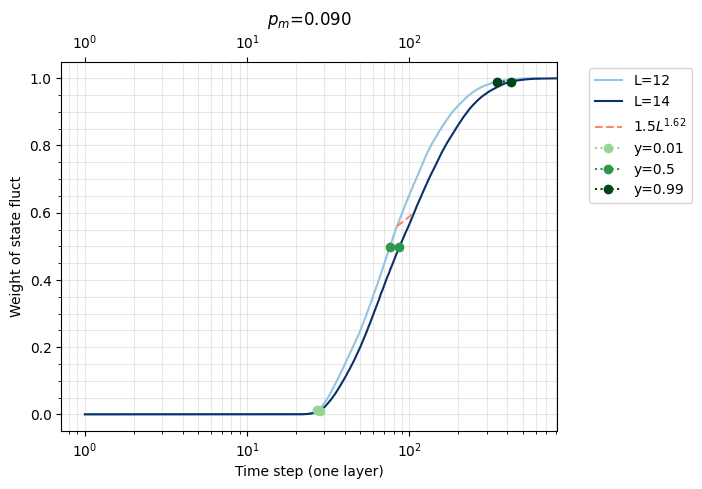

In [19]:
fig, ax=plt.subplots()

quantile_pts = clifford_utils.plot_metric_T_vs_steps_fixedp_m( data_df, p_m=0.09, metric='state_weight' ,ylabel='Weight of state fluct',  ax=ax, yscale='linear', prefactor=1.5 , quantile = [.01,0.50,0.99], L_list=L_list)

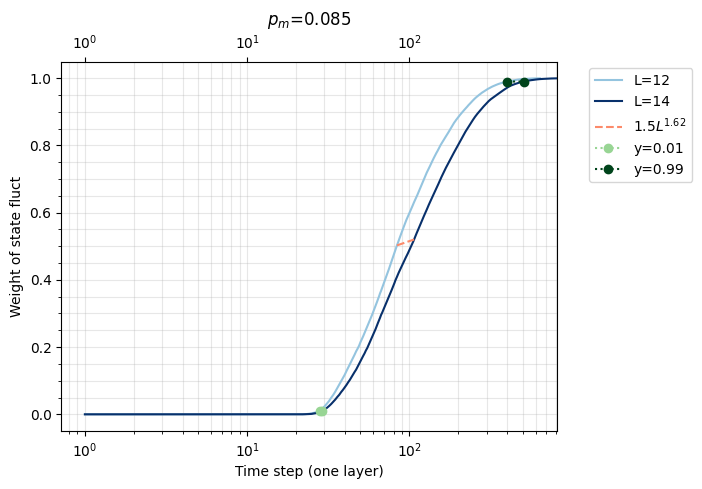

In [22]:
fig, ax=plt.subplots()

quantile_pts = clifford_utils.plot_metric_T_vs_steps_fixedp_m( data_df, p_m=0.085, metric='state_weight' ,ylabel='Weight of state fluct',  ax=ax, yscale='linear', prefactor=1.5 , quantile = [.01,0.99], L_list=L_list)

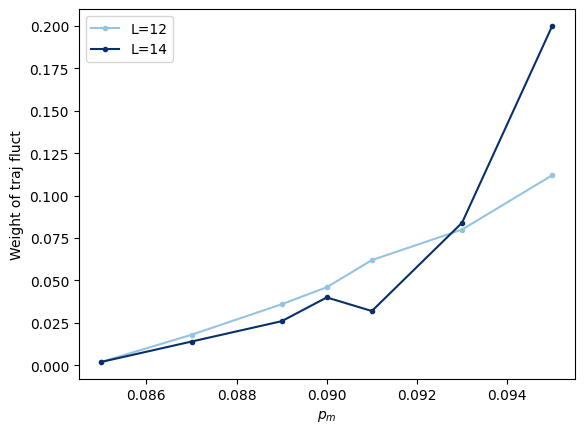

In [11]:
traj_weight=clifford_utils.plot_metric_T_vs_p(data_df, metric='traj_weight', min_func = lambda L: int(6.*L**1.6)-1, max_func = lambda L: int(6.*L**1.6)-0,  ylabel='Weight of traj fluct', L_list=L_list, )


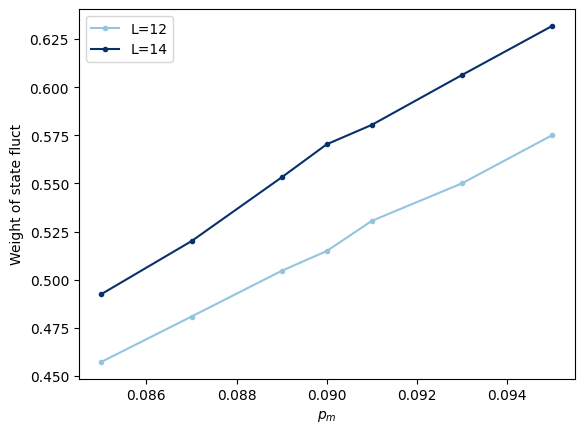

In [24]:
traj_weight=clifford_utils.plot_metric_T_vs_p(data_df, metric='state_weight', min_func = lambda L: int(1.5*L**1.6)-1, max_func = lambda L: int(1.5*L**1.6)-0,  ylabel='Weight of state fluct', L_list=L_list, )
